In [1]:
from opt_policy_1link_sats import *
from satellite_simulations_3Oct2019 import eta_Tot_alt
from links import *
import matplotlib.pyplot as plt

In [2]:
### NOTE: The function eta_Tot_alt is for the situation in which two
### ground stations are separated by a distance d, and both of them
### are the *same* distance away from a satellite at altitude h.

In [3]:
Bell1=Bell_state(2,0,0,density_matrix=True)
Bell1=np.matrix(block_diag(Bell1,[0]))

In [4]:
def coherence_time(d,x):
    
    ### d is the distance between ground stations (in km);
    ### x is the coherence time of the memories (in seconds)

    c=3e8  # speed of light in m/s
    
    return int(x*c/(2*d*1e3))

In [5]:
def link_fidelities(T,d,x,h,n1,n2,M=1,fs=1,normalized=False):
    
    ### Fidelity quantity \tilde{F} as a function of t for the t^{\star}=infinity policy.
    
    ### We assume that the ground stations are separated by distance d,
    ### and that the satellite is at altitude h (in km)
    ### T is the total time duration
    ### x is the coherence time of the quantum memories (in seconds)
    
    eta=eta_Tot_alt(d*1e3,h*1e3)
    
    p=P(n1,n2,eta,eta,M=M)
    p1=P(n1,n2,eta,eta,M=1)
    
    t_coh=coherence_time(d,x)
    
    x1=X(n1,eta)
    x2=X(n2,eta)
    y1=Y(n1,eta)
    y2=Y(n2,eta)
    z1=Z(n1,eta)
    z2=Z(n2,eta)

    a=x1*x2+y1*y2
    b=z1*z2
    c=x1*y2+y1*x2
    
    alpha=(1/p)*((1/2)*fs*a+(1/2)*((1-fs)/3)*(a+2*c))
    beta=(1/p)*((1/2)*fs*b-(1/2)*((1-fs)/3)*b)
    
    alpha=((1/p1)*(1-(1-p1)**M))*alpha
    beta=((1/p1)*(1-(1-p1)**M))*beta
    
    z=np.exp(1/t_coh)
    w=(1-p)
    
    #return [avg_link_fidelity(t,p,np.inf,2,fs,t_coh=t_coh) for t in range(1,T+1)]
    
    if normalized:
        return [(1/(1-(1-p)**t))*(alpha*((z**2*(z**(-2*t)-w**t)*p)/(1-z**2*w))+(beta-1/2)*((z*(z**(-t)-w**t)*p)/(1-z*w))+(1/2)*(1-w**t)) for t in range(1,T+1)]
    else:
        return [(alpha*((z**2*(z**(-2*t)-w**t)*p)/(1-z**2*w))+(beta-1/2)*((z*(z**(-t)-w**t)*p)/(1-z*w))+(1/2)*(1-w**t)) for t in range(1,T+1)]
    
    
    
    

In [227]:
d_array=np.array([100,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000])
h_array=np.array([100,500,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000])

In [228]:
h_array

array([  100,   500,  1000,  1500,  2000,  3000,  4000,  5000,  6000,
        7000,  8000,  9000, 10000])

In [403]:
fids1={}
fids1_norm={}
probs1={}
for d in d_array:
    fids1[d]={}
    fids1_norm[d]={}
    probs1[d]={}
    
fids60={}
fids60_norm={}
probs60={}
for d in d_array:
    fids60[d]={}
    fids60_norm[d]={}
    probs60[d]={}

In [404]:
### Coherence time of 1 second and 60 seconds, n1=n2=1e-4

for d in d_array:
    for h in h_array:
        fids1[d][h]=link_fidelities(10000,d,1,h,1e-4,1e-4,M=1e5,fs=1)
        fids1_norm[d][h]=link_fidelities(10000,d,1,h,1e-4,1e-4,M=1e5,fs=1,normalized=True)
        probs1[d][h]=P(1e-4,1e-4,eta_Tot_alt(d*1e3,h*1e3),eta_Tot_alt(d*1e3,h*1e3),M=1e5)
        
        fids60[d][h]=link_fidelities(10000,d,60,h,1e-4,1e-4,M=1e5,fs=1)
        fids60_norm[d][h]=link_fidelities(10000,d,60,h,1e-4,1e-4,M=1e5,fs=1,normalized=True)
        probs60[d][h]=P(1e-4,1e-4,eta_Tot_alt(d*1e3,h*1e3),eta_Tot_alt(d*1e3,h*1e3),M=1e5)

In [406]:
T=np.linspace(1,10000,10000)

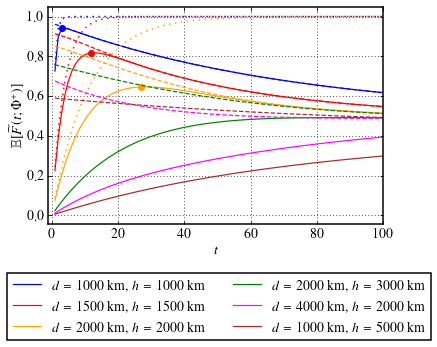

In [439]:

plt.plot(T,fids1[1000][1000],color='blue',label=r'$d=1000$ km, $h=1000$ km')
plt.plot(T,fids1_norm[1000][1000],color='blue',linestyle='--')
plt.plot(np.argmax(fids1[1000][1000]),np.max(fids1[1000][1000]),marker='o',color='blue')
plt.plot(T,[1-(1-probs1[1000][1000])**t for t in T],color='blue',linestyle=':',linewidth=1.5)

plt.plot(T,fids1[1500][1500],color='red',label=r'$d=1500$ km, $h=1500$ km')
plt.plot(T,fids1_norm[1500][1500],color='red',linestyle='--')
plt.plot(np.argmax(fids1[1500][1500]),np.max(fids1[1500][1500]),marker='o',color='red')
plt.plot(T,[1-(1-probs1[1500][1500])**t for t in T],color='red',linestyle=':',linewidth=1.5)


plt.plot(T,fids1[2000][2000],color='orange',label=r'$d=2000$ km, $h=2000$ km')
plt.plot(T,fids1_norm[2000][2000],color='orange',linestyle='--')
plt.plot(np.argmax(fids1[2000][2000]),np.max(fids1[2000][2000]),marker='o',color='orange')
plt.plot(T,[1-(1-probs1[2000][2000])**t for t in T],color='orange',linestyle=':',linewidth=1.5)


plt.plot(T,fids1[2000][3000],color='green',label=r'$d=2000$ km, $h=3000$ km')
plt.plot(T,fids1_norm[2000][3000],color='green',linestyle='--')
plt.plot(np.argmax(fids1[2000][3000]),np.max(fids1[2000][3000]),marker='o',color='green')


plt.plot(T,fids1[4000][2000],color='magenta',label=r'$d=4000$ km, $h=2000$ km')
plt.plot(T,fids1_norm[4000][2000],color='magenta',linestyle='--')
plt.plot(np.argmax(fids1[4000][2000]),np.max(fids1[4000][2000]),marker='o',color='magenta')


plt.plot(T,fids1[1000][5000],color='brown',label=r'$d=1000$ km, $h=5000$ km')
plt.plot(T,fids1_norm[1000][5000],color='brown',linestyle='--')
plt.plot(np.argmax(fids1[1000][5000]),np.max(fids1[1000][5000]),marker='o',color='brown')


plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$\mathbb{E}[\widetilde{F}(t;\Phi^+)]$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([-1,100])
#plt.ylim([0.45,1])

plt.legend(loc='center',ncol=2,bbox_to_anchor = (0.02,-0.66,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)

#plt.tight_layout()


plt.show()

In [416]:



plt.plot(T,fids60[1000][1000],color='blue',label=r'$d=1000$ km, $h=1000$ km')
plt.plot(T,fids60_norm[1000][1000],color='blue',linestyle='--')
plt.plot(np.argmax(fids60[1000][1000]),np.max(fids60[1000][1000]),marker='o',color='blue')


plt.plot(T,fids60[1500][1500],color='red',label=r'$d=1500$ km, $h=1500$ km')
plt.plot(T,fids60_norm[1500][1500],color='red',linestyle='--')
plt.plot(np.argmax(fids60[1500][1500]),np.max(fids60[1500][1500]),marker='o',color='red')


plt.plot(T,fids60[2000][2000],color='orange',label=r'$d=2000$ km, $h=2000$ km')
plt.plot(T,fids60_norm[2000][2000],color='orange',linestyle='--')
plt.plot(np.argmax(fids60[2000][2000]),np.max(fids60[2000][2000]),marker='o',color='orange')


plt.plot(T,fids60[2000][3000],color='green',label=r'$d=2000$ km, $h=3000$ km')
plt.plot(T,fids60_norm[2000][3000],color='green',linestyle='--')
plt.plot(np.argmax(fids60[2000][3000]),np.max(fids60[2000][3000]),marker='o',color='green')


plt.plot(T,fids60[4000][2000],color='magenta',label=r'$d=4000$ km, $h=2000$ km')
plt.plot(T,fids60_norm[4000][2000],color='magenta',linestyle='--')
plt.plot(np.argmax(fids60[4000][2000]),np.max(fids60[4000][2000]),marker='o',color='magenta')


plt.plot(T,fids60[1000][5000],color='brown',label=r'$d=1000$ km, $h=5000$ km')
plt.plot(T,fids60_norm[1000][5000],color='brown',linestyle='--')
plt.plot(np.argmax(fids60[1000][5000]),np.max(fids60[1000][5000]),marker='o',color='brown')


plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$\mathbb{E}[\widetilde{F}(t;\Phi^+)]$',fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim([-10,1000])
#plt.ylim([0.45,1])

plt.legend(loc='center',ncol=2,bbox_to_anchor = (0.02,-0.66,1,1),bbox_transform = plt.gcf().transFigure,fontsize=14)

#plt.tight_layout()


plt.show()

In [446]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

ax[0].plot(T,fids1[1000][1000],color='blue',label=r'$d=1000$ km, $h=1000$ km')
ax[0].plot(T,fids1_norm[1000][1000],color='blue',linestyle='--')
ax[0].plot(np.argmax(fids1[1000][1000]),np.max(fids1[1000][1000]),marker='o',color='blue')
ax[0].plot(T,[1-(1-probs1[1000][1000])**t for t in T],color='blue',linestyle=':',linewidth=1.5)


ax[0].plot(T,fids1[1500][1500],color='red',label=r'$d=1500$ km, $h=1500$ km')
ax[0].plot(T,fids1_norm[1500][1500],color='red',linestyle='--')
ax[0].plot(np.argmax(fids1[1500][1500]),np.max(fids1[1500][1500]),marker='o',color='red')
ax[0].plot(T,[1-(1-probs1[1500][1500])**t for t in T],color='red',linestyle=':',linewidth=1.5)


ax[0].plot(T,fids1[2000][2000],color='orange',label=r'$d=2000$ km, $h=2000$ km')
ax[0].plot(T,fids1_norm[2000][2000],color='orange',linestyle='--')
ax[0].plot(np.argmax(fids1[2000][2000]),np.max(fids1[2000][2000]),marker='o',color='orange')
ax[0].plot(T,[1-(1-probs1[2000][2000])**t for t in T],color='orange',linestyle=':',linewidth=1.5)


ax[0].plot(T,fids1[2000][3000],color='green',label=r'$d=2000$ km, $h=3000$ km')
ax[0].plot(T,fids1_norm[2000][3000],color='green',linestyle='--')
ax[0].plot(np.argmax(fids1[2000][3000]),np.max(fids1[2000][3000]),marker='o',color='green')
ax[0].plot(T,[1-(1-probs1[2000][3000])**t for t in T],color='green',linestyle=':',linewidth=1.5)


ax[0].plot(T,fids1[4000][2000],color='magenta',label=r'$d=4000$ km, $h=2000$ km')
ax[0].plot(T,fids1_norm[4000][2000],color='magenta',linestyle='--')
ax[0].plot(np.argmax(fids1[4000][2000]),np.max(fids1[4000][2000]),marker='o',color='magenta')
ax[0].plot(T,[1-(1-probs1[4000][2000])**t for t in T],color='magenta',linestyle=':',linewidth=1.5)


ax[0].plot(T,fids1[1000][5000],color='brown',label=r'$d=1000$ km, $h=5000$ km')
ax[0].plot(T,fids1_norm[1000][5000],color='brown',linestyle='--')
ax[0].plot(np.argmax(fids1[1000][5000]),np.max(fids1[1000][5000]),marker='o',color='brown')
ax[0].plot(T,[1-(1-probs1[1000][5000])**t for t in T],color='brown',linestyle=':',linewidth=1.5)


ax[0].set_xlabel(r'$t$',fontsize=16)
#ax[0].set_ylabel(r'$\mathbb{E}[\widetilde{F}(t;\Phi^+)]$',fontsize=14)

ax[0].tick_params(axis='x',labelsize=16)
ax[0].tick_params(axis='y',labelsize=16)

ax[0].set_xlim([-1,100])
#plt.ylim([0.45,1])



ax[1].plot(T,fids60[1000][1000],color='blue')#,label=r'$d=1000$ km, $h=1000$ km')
ax[1].plot(T,fids60_norm[1000][1000],color='blue',linestyle='--')
ax[1].plot(np.argmax(fids60[1000][1000]),np.max(fids60[1000][1000]),marker='o',color='blue')
ax[1].plot(T,[1-(1-probs60[1000][1000])**t for t in T],color='blue',linestyle=':',linewidth=1.5)


ax[1].plot(T,fids60[1500][1500],color='red')#,label=r'$d=1500$ km, $h=1500$ km')
ax[1].plot(T,fids60_norm[1500][1500],color='red',linestyle='--')
ax[1].plot(np.argmax(fids60[1500][1500]),np.max(fids60[1500][1500]),marker='o',color='red')
ax[1].plot(T,[1-(1-probs60[1500][1500])**t for t in T],color='red',linestyle=':',linewidth=1.5)


ax[1].plot(T,fids60[2000][2000],color='orange')#,label=r'$d=2000$ km, $h=2000$ km')
ax[1].plot(T,fids60_norm[2000][2000],color='orange',linestyle='--')
ax[1].plot(np.argmax(fids60[2000][2000]),np.max(fids60[2000][2000]),marker='o',color='orange')
ax[1].plot(T,[1-(1-probs60[2000][2000])**t for t in T],color='orange',linestyle=':',linewidth=1.5)


ax[1].plot(T,fids60[2000][3000],color='green')#,label=r'$d=2000$ km, $h=3000$ km')
ax[1].plot(T,fids60_norm[2000][3000],color='green',linestyle='--')
ax[1].plot(np.argmax(fids60[2000][3000]),np.max(fids60[2000][3000]),marker='o',color='green')
ax[1].plot(T,[1-(1-probs60[2000][3000])**t for t in T],color='green',linestyle=':',linewidth=1.5)


ax[1].plot(T,fids60[4000][2000],color='magenta')#,label=r'$d=4000$ km, $h=2000$ km')
ax[1].plot(T,fids60_norm[4000][2000],color='magenta',linestyle='--')
ax[1].plot(np.argmax(fids60[4000][2000]),np.max(fids60[4000][2000]),marker='o',color='magenta')
ax[1].plot(T,[1-(1-probs60[4000][2000])**t for t in T],color='magenta',linestyle=':',linewidth=1.5)


ax[1].plot(T,fids60[1000][5000],color='brown')#,label=r'$d=1000$ km, $h=5000$ km')
ax[1].plot(T,fids60_norm[1000][5000],color='brown',linestyle='--')
ax[1].plot(np.argmax(fids60[1000][5000]),np.max(fids60[1000][5000]),marker='o',color='brown')
ax[1].plot(T,[1-(1-probs60[1000][5000])**t for t in T],color='brown',linestyle=':',linewidth=1.5)


ax[1].set_xlabel(r'$t$',fontsize=16)
#ax[1].set_ylabel(r'$\mathbb{E}[\widetilde{F}(t;\Phi^+)]$',fontsize=14)

ax[1].tick_params(axis='x',labelsize=16)
ax[1].tick_params(axis='y',labelsize=16)

ax[1].set_xlim([-10,600])
ax[1].set_ylim([0.4,1])


fig.legend(loc='center',ncol=2,bbox_to_anchor = (0.01,-0.6,1,1),bbox_transform = plt.gcf().transFigure,fontsize=16)


fig.tight_layout(pad=2)

fig.savefig('fids_tstarInf.pdf',bbox_inches='tight')

fig.show()




In [8]:
d_array2=np.linspace(100,6000,600)
h_array2=np.linspace(100,10000,600)

fids_max=np.array([[max(link_fidelities(5000,d,1,h,1e-4,1e-4,M=1e5)) for d in d_array2] for h in h_array2])


fids_max[fids_max<=0.5]=None

D,H=np.meshgrid(d_array2,h_array2)


KeyboardInterrupt: 